In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/sonar.csv")

In [3]:
dum_df = pd.get_dummies(df,drop_first=True)

In [5]:
dum_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class_R
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,0
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,0
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,0
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,0


In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import BaggingClassifier

In [6]:
X = dum_df.iloc[:,0:-1]
y = dum_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2021,
                                                    stratify=y)

In [8]:
# Default: Tree Classifier
model_bg_Tree = BaggingClassifier(random_state=2021,oob_score=True,
                             max_features=X_train.shape[1],
                             n_estimators=15,
                             max_samples=X_train.shape[0])

In [9]:
#OR for any other model bagging
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

model_bg_logreg = BaggingClassifier(base_estimator = logreg ,
                             random_state=2021,oob_score=True,
                             max_features=X_train.shape[1],
                             n_estimators=15,max_samples=X_train.shape[0])

In [10]:
#OR for any other model bagging
from sklearn.naive_bayes import GaussianNB

GaussianNB = GaussianNB()

model_bg_GaussianNB = BaggingClassifier(base_estimator = GaussianNB ,
                             random_state=2021,oob_score=True,
                             max_features=X_train.shape[1],
                             n_estimators=15,max_samples=X_train.shape[0])

In [12]:
model_bg_Tree.fit( X_train , y_train )

print("Out of Bag Score = " + "{:.4f}".format(model_bg_Tree.oob_score_))

model_bg_logreg.fit( X_train , y_train )

print("Out of Bag Score = " + "{:.4f}".format(model_bg_logreg.oob_score_))

model_bg_GaussianNB.fit( X_train , y_train )

print("Out of Bag Score = " + "{:.4f}".format(model_bg_GaussianNB.oob_score_))

Out of Bag Score = 0.7448
Out of Bag Score = 0.7931
Out of Bag Score = 0.7034


In [13]:
y_pred_Tree = model_bg_Tree.predict(X_test)

print(confusion_matrix(y_test, y_pred_Tree))
print(classification_report(y_test, y_pred_Tree))
print(accuracy_score(y_test, y_pred_Tree))


[[32  2]
 [12 17]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        34
           1       0.89      0.59      0.71        29

    accuracy                           0.78        63
   macro avg       0.81      0.76      0.76        63
weighted avg       0.80      0.78      0.77        63

0.7777777777777778


In [14]:
y_pred_logreg = model_bg_logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print(accuracy_score(y_test, y_pred_logreg))


[[27  7]
 [ 7 22]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        34
           1       0.76      0.76      0.76        29

    accuracy                           0.78        63
   macro avg       0.78      0.78      0.78        63
weighted avg       0.78      0.78      0.78        63

0.7777777777777778


In [15]:
y_pred_GaussianNB = model_bg_GaussianNB.predict(X_test)

print(confusion_matrix(y_test, y_pred_GaussianNB))
print(classification_report(y_test, y_pred_GaussianNB))
print(accuracy_score(y_test, y_pred_GaussianNB))


[[22 12]
 [11 18]]
              precision    recall  f1-score   support

           0       0.67      0.65      0.66        34
           1       0.60      0.62      0.61        29

    accuracy                           0.63        63
   macro avg       0.63      0.63      0.63        63
weighted avg       0.64      0.63      0.64        63

0.6349206349206349


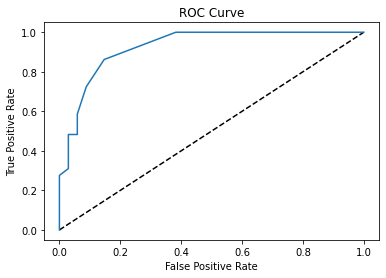

0.9254563894523327

In [16]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob_Tree = model_bg_Tree.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_Tree)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob_Tree)

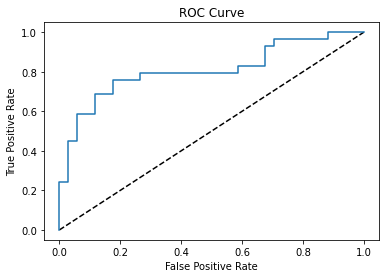

0.8073022312373225

In [21]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_logreg = model_bg_logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_logreg)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob_logreg)

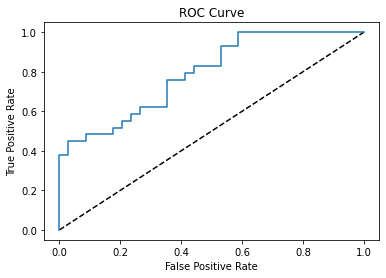

0.7910750507099391

In [20]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob_GaussianNB = model_bg_GaussianNB.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_GaussianNB)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob_GaussianNB)